# Setup

In [ ]:
!kill -9 -1 #run to reset

In [ ]:
#colab stuff
!pip install mne
%config InlineBackend.figure_format='retina'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 41.6 MB/s eta 0:00:00


In [ ]:
#constant definitions
sampling_rate = 500 #sampling rate in hz
sampling_frequency = int(1000/sampling_rate) #the time in ms between samples
frame_length = 500 #frame length in ms
channels = ["Cz", "P3", "C3", "F3", "Fz", "F4", "C4", "P4"]
temp_channels = ["EEG-Cz", "EEG-10", "EEG-C3", "EEG-1", "EEG-Fz", "EEG-3", "EEG-C4", "EEG-12"]
channel_map = dict(zip(temp_channels, channels))
outputs = ["HandStart","Replace"]
#outputs = ["HandStart", "FirstDigitTouch", "BothStartLoadPhase", "LiftOff", "Replace", "BothReleased"]
channel_num = len(channels)
output_num = len(outputs)
#subject_num = 12
#event_ids = {'bad_rejected': 1023, 'eye_movements': 1072, 'idle_EEG_open': 276, 'idle_EEG_closed': 277, 'start_run': 32766, 'start_trial': 768, 'left': 769, 'right': 770, 'foot': 771, 'tongue': 772}
#event_ids = {'bad_rejected': 1023, 'eye_movements': 1072, 'start_run': 32766, 'start_trial': 768, 'left': 769, 'right': 770, 'foot': 771, 'tongue': 772}
event_ids = {'left': 769, 'right': 770}

event_id_map = {'276':276, '277':277, '768':768, '769':769, '770':770, '771':771, '772':772, '783':783, '1023':1023, '1072':1072, '32766':32766}

In [ ]:
#data handling imports
import pandas as pd
import numpy as np
from scipy import signal
from scipy.fft import fftshift
from glob import glob
import matplotlib.pyplot as plt
import sklearn as skl
import sklearn.model_selection

#image processing imports
from PIL import Image

#EEG imports
import mne
from mne import io

#ML imports
import tensorflow as tf
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Activation, Dropout



# File imports

In [ ]:
#file import
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
train_data_path = "/content/drive/MyDrive/Colab Notebooks/Data/BCICIV_2a"
#test_data_path = train_data_path
trainFileNames = glob(train_data_path + "/*T.gdf")
#testFileNames = glob(train_data_path + "/B010*E.gdf")

rawTrain = [io.read_raw_gdf(i, preload=True).pick_channels(temp_channels).rename_channels(channel_map).set_montage('standard_1020') for i in trainFileNames]
#rawTest = mne.concatenate_raws([io.read_raw_gdf(i) for i in testFileNames])

Extracting EDF parameters from /content/drive/MyDrive/Colab Notebooks/Data/BCICIV_2a/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...


/usr/lib/python3.9/contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Reading 0 ... 672527  =      0.000 ...  2690.108 secs...
Extracting EDF parameters from /content/drive/MyDrive/Colab Notebooks/Data/BCICIV_2a/A02T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 677168  =      0.000 ...  2708.672 secs...


/usr/lib/python3.9/contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /content/drive/MyDrive/Colab Notebooks/Data/BCICIV_2a/A03T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 660529  =      0.000 ...  2642.116 secs...


/usr/lib/python3.9/contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /content/drive/MyDrive/Colab Notebooks/Data/BCICIV_2a/A04T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 600914  =      0.000 ...  2403.656 secs...


/usr/lib/python3.9/contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /content/drive/MyDrive/Colab Notebooks/Data/BCICIV_2a/A05T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 686119  =      0.000 ...  2744.476 secs...


/usr/lib/python3.9/contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /content/drive/MyDrive/Colab Notebooks/Data/BCICIV_2a/A07T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 681070  =      0.000 ...  2724.280 secs...


/usr/lib/python3.9/contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /content/drive/MyDrive/Colab Notebooks/Data/BCICIV_2a/A06T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 678979  =      0.000 ...  2715.916 secs...


/usr/lib/python3.9/contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /content/drive/MyDrive/Colab Notebooks/Data/BCICIV_2a/A08T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 675269  =      0.000 ...  2701.076 secs...


/usr/lib/python3.9/contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /content/drive/MyDrive/Colab Notebooks/Data/BCICIV_2a/A09T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 673327  =      0.000 ...  2693.308 secs...


/usr/lib/python3.9/contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


In [ ]:
all_events = [mne.events_from_annotations(i, event_id=event_id_map) for i in rawTrain]
events = [mne.pick_events(i[0], include=[769, 770]) for i in all_events]
#events = [mne.pick_events(i[0], exclude=[276, 277]) for i in all_events]

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Used Annotations descriptions: ['1023', '1072', '32766', '768', '769', '770', '771', '772']
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']


#Preprocessing

##filtering

Effective window size : 1.024 (s)


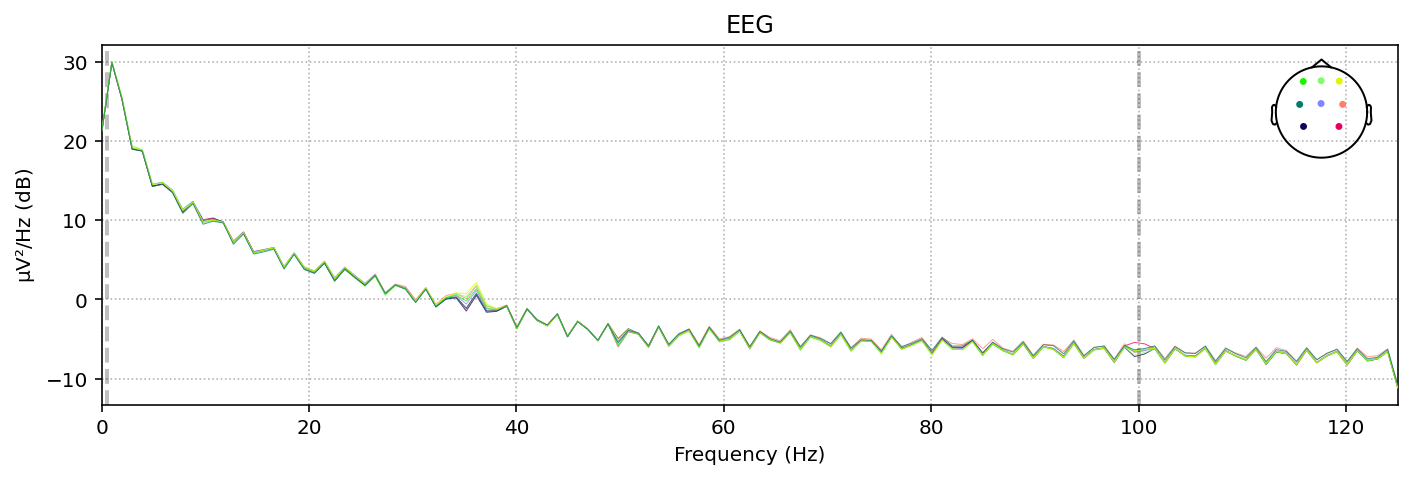

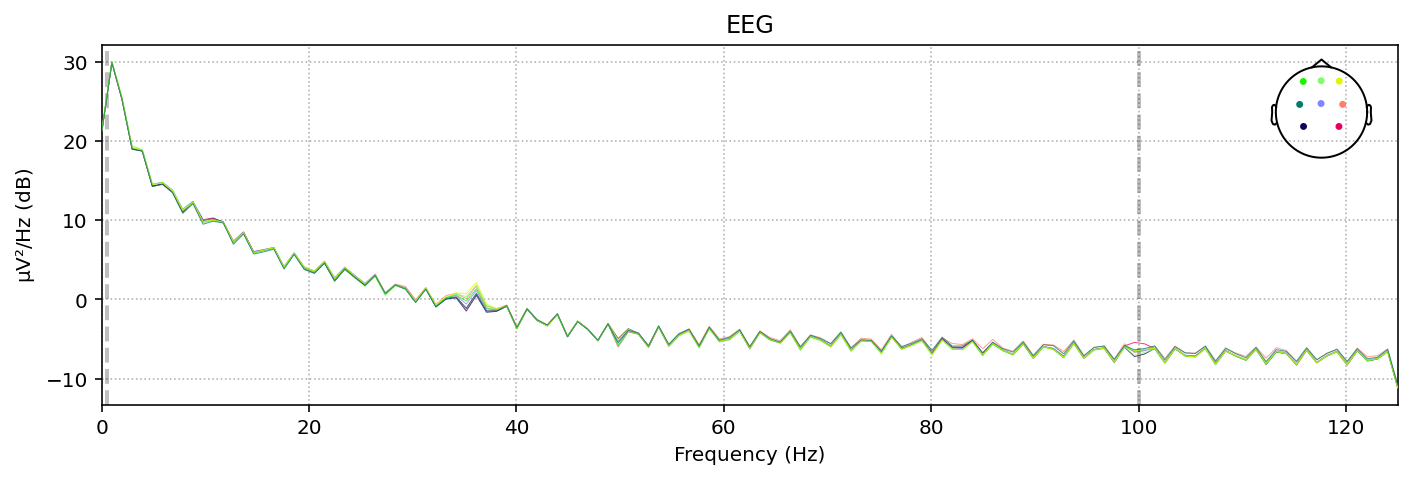

In [ ]:
rawTrain[0].compute_psd().plot()

In [ ]:
filteredTrain = [i.copy().filter(7.5, 30, method = 'iir') for i in rawTrain]

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7.5 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.50, 30.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7.5 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.50, 30.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7.5 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.50, 30.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up b

Effective window size : 1.024 (s)


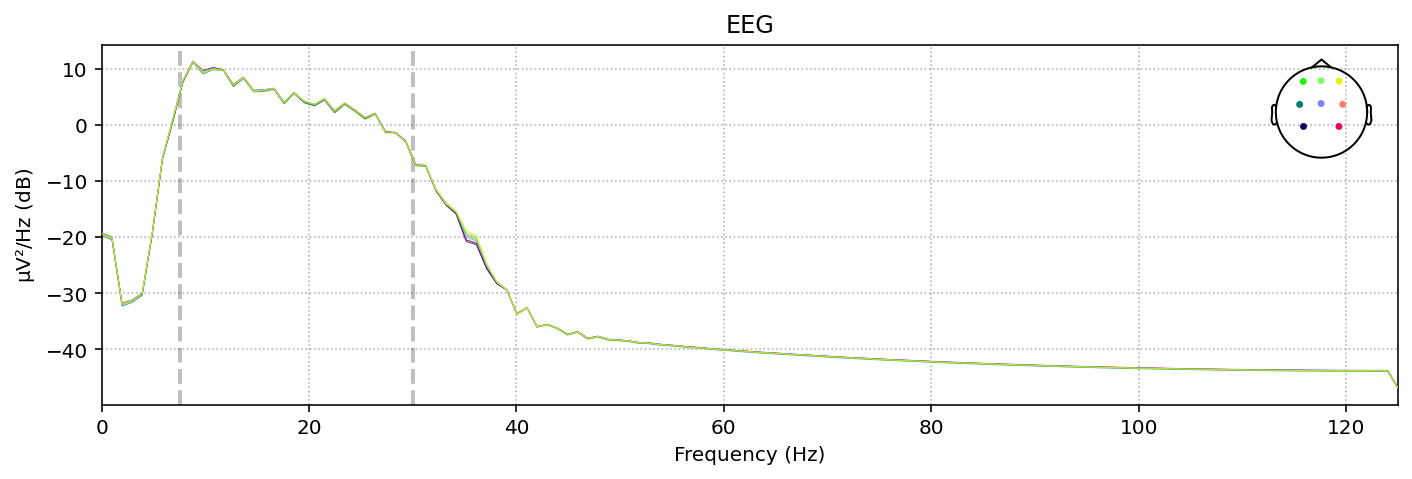

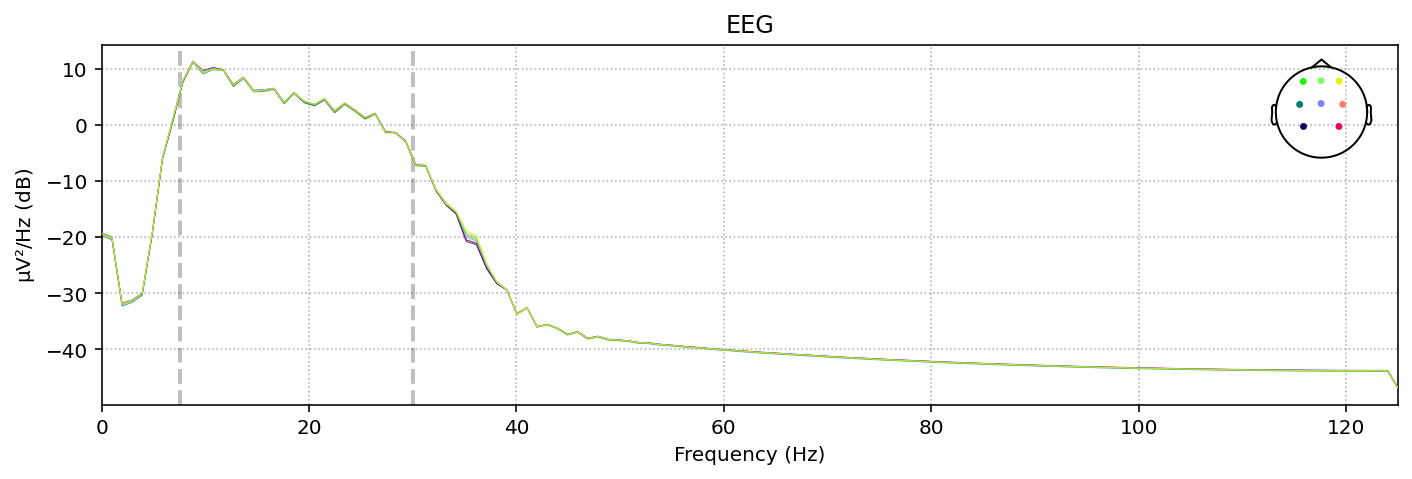

In [ ]:
filteredTrain[0].compute_psd().plot()

##epoch extraction

In [ ]:
epochs = [mne.Epochs(filteredTrain[i], events[i], event_id=event_ids, event_repeated = 'merge', tmin=-1., tmax=1) for i in range(len(events))]

Not setting metadata
144 matching events found
Setting baseline interval to [-1.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
144 matching events found
Setting baseline interval to [-1.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
144 matching events found
Setting baseline interval to [-1.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
144 matching events found
Setting baseline interval to [-1.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
144 matching events found
Setting baseline interval to [-1.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
144 matching events found
Setting baseline interval to [-1.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
1

In [ ]:
for i in epochs:
  print(i.event_id)

{'left': 769, 'right': 770}
{'left': 769, 'right': 770}
{'left': 769, 'right': 770}
{'left': 769, 'right': 770}
{'left': 769, 'right': 770}
{'left': 769, 'right': 770}
{'left': 769, 'right': 770}
{'left': 769, 'right': 770}
{'left': 769, 'right': 770}


In [ ]:
##merge events
#for e in epochs[0:3]:
#  e.events = mne.merge_events(e.events, [32766, 1, 2, 3], [10])
#  e.events = mne.merge_events(e.events, [4], [20])
#for e in epochs[4:]:
#  e.events = mne.merge_events(e.events, [32766, 1, 2, 3], [10])
#  e.events = mne.merge_events(e.events, [4], [20])

#epochs[3].events = mne.merge_events(epochs[3].events, [32766, 1], [10])
#epochs[3].events = mne.merge_events(epochs[3].events, [2], [20])

In [ ]:
print(epochs[2].events)

Using data from preloaded Raw for 1 events and 501 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


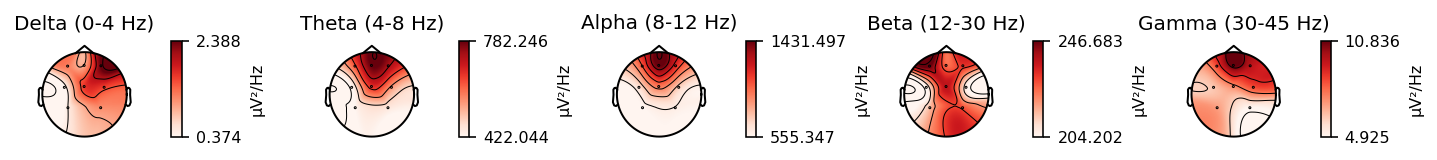

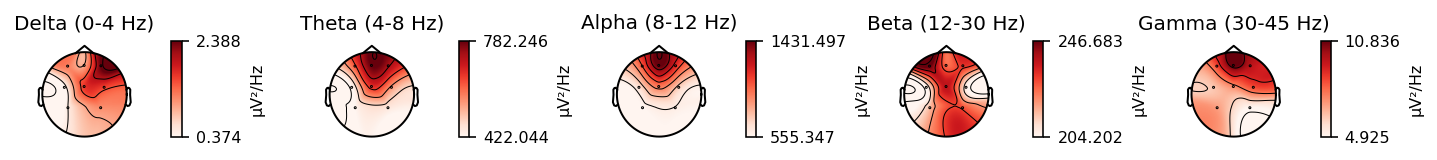

In [ ]:
epochs[0][5].compute_psd().plot_topomap()

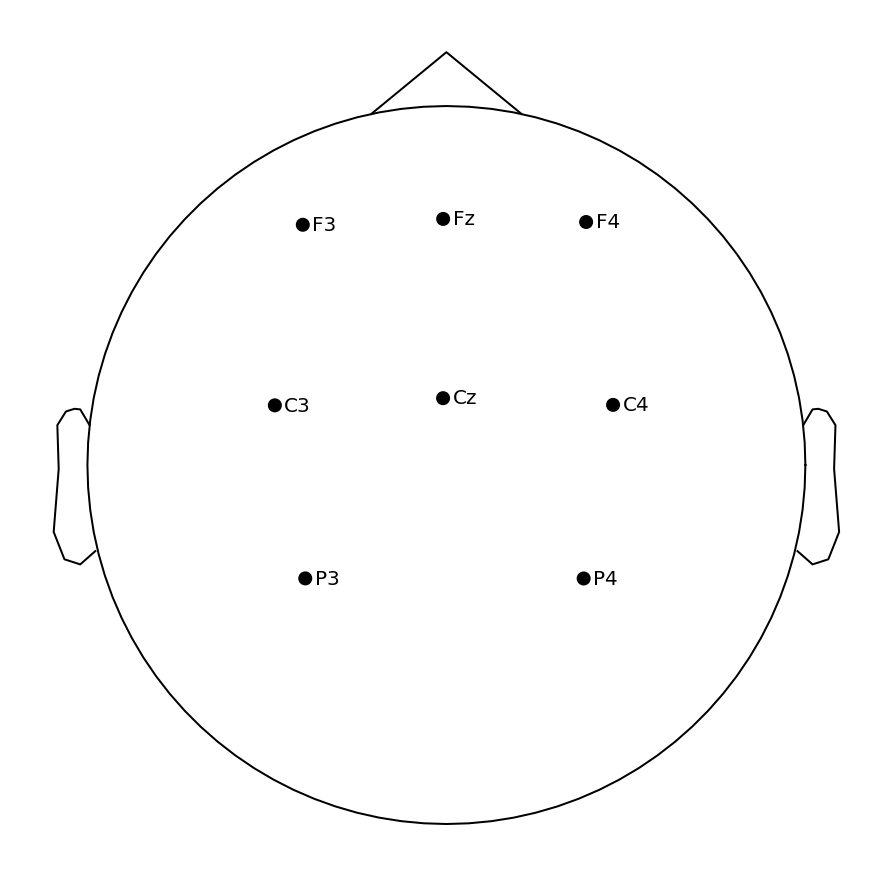

In [ ]:
fig = epochs[0].info.get_montage().plot()

##get labels

In [ ]:
labels = [i.events[:,-1] for i in epochs]

##CSP demo

Using data from preloaded Raw for 144 events and 501 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 4.3e-06 (2.2e-16 eps * 8 dim * 2.4e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.3e-06 (2.2e-16 eps * 8 dim * 2.4e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.


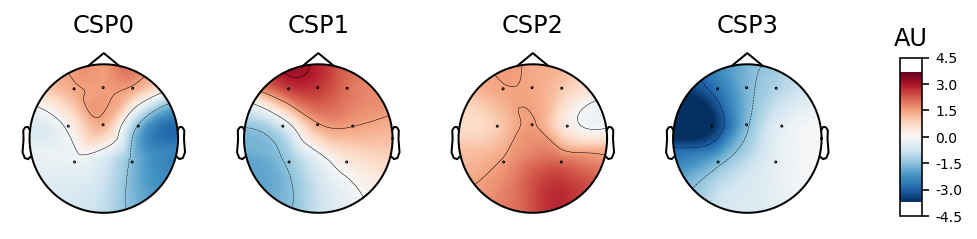

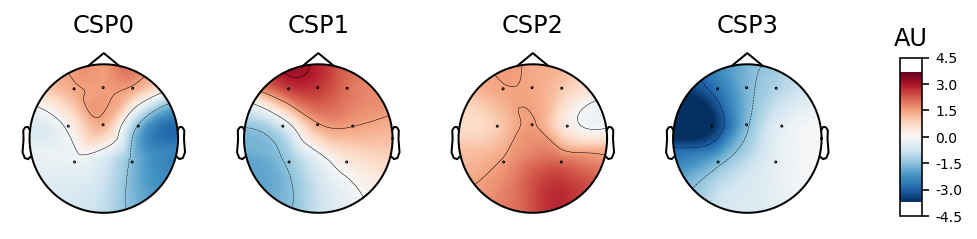

In [ ]:
csp = mne.decoding.CSP(transform_into='csp_space')
out = csp.fit_transform(epochs[0].get_data(), labels[0])
csp.plot_patterns(epochs[0].info)

In [ ]:
print(out.shape)

(144, 4, 176)


In [ ]:
csp = mne.decoding.CSP(transform_into='csp_space')
_labels = [x if x == 769 or x == 770 else 0 for x in labels[0]]
csp.fit_transform(mne.pick_events(epochs[0], include=[769, 770]).get_data(), labels[0])
csp.plot_patterns(epochs[0].info)

RuntimeError: ignored

##stockwell demo

In [ ]:
print(epochs[0][0])

AttributeError: ignored

In [ ]:
print(epochs[0][0].get_data().shape)

Using data from preloaded Raw for 1 events and 501 original time points ...
(1, 8, 501)


In [ ]:
for i in epochs[0]:
  print(type(i))

In [ ]:
print(len(epochs[0]))

144


In [ ]:
s_trans_epochs_arr=[]
for i in range(len(epochs[0])):
  #print(type(i))
  s_trans_epochs_arr.append(mne.time_frequency.tfr_array_stockwell(epochs[0][i].get_data(), epochs[0].info['sfreq'], 8, 28)[0])

In [ ]:
print(s_trans_epochs_arr[0].nave)

AttributeError: ignored

In [ ]:
print([i.data.shape for i in s_trans_epochs_arr])

[(8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 41, 501), (8, 4

In [ ]:
print(s_trans_epochs[0].data)

In [ ]:
print(s_trans_epochs_arr[1])

In [ ]:
print(s_trans_epochs[1].data)

##CSP + Stockwell demo

In [ ]:
print(epochs[0].get_data().shape)

Using data from preloaded Raw for 144 events and 501 original time points ...
(144, 8, 501)


Using data from preloaded Raw for 144 events and 501 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 4.9e-06 (2.2e-16 eps * 8 dim * 2.8e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.9e-06 (2.2e-16 eps * 8 dim * 2.7e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.


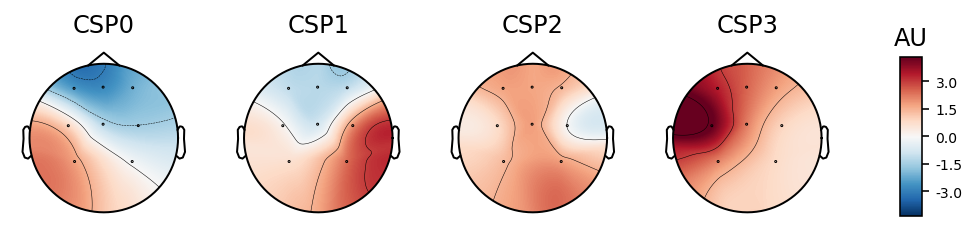

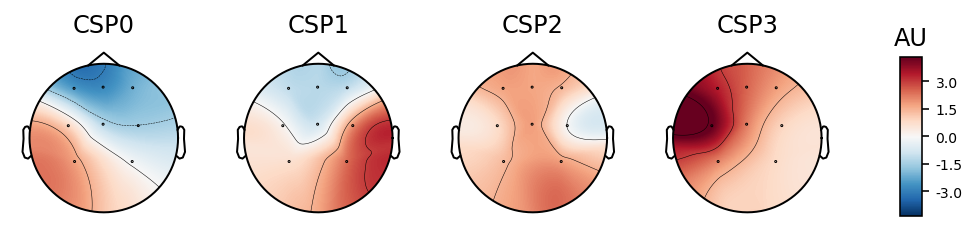

In [ ]:
csp = mne.decoding.CSP(transform_into='csp_space')
out = csp.fit_transform(epochs[0].get_data(), labels[0])
csp.plot_patterns(epochs[0].info)

In [ ]:
print([i.shape for i in out])

[(4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501), (4, 501),

In [ ]:
s_trans_epochs_arr=[]

#for i in range(len(epochs[0])):
  #s_trans_epochs_arr.append(mne.time_frequency.tfr_array_stockwell(epochs[0][i].get_data(), epochs[0].info['sfreq'], 8, 28)[0])

for i in out:
  s_trans_epochs_arr.append(mne.time_frequency.tfr_array_stockwell(np.expand_dims(i, axis=0), epochs[0].info['sfreq'], 8, 28)[0])

In [ ]:
print(s_trans_epochs_arr[0].shape)

(4, 41, 501)


##Train/Test split and CSP and Stockwell transform

In [ ]:
for i in range(len(epochs)):
  print(epochs[i].get_data().shape)
  print(labels[i].shape)

In [ ]:
trainX, testX, trainYLabels, testYLabels = [], [], [], []
trainXS, testXS = [], []
CSPs = [mne.decoding.CSP(2, transform_into='csp_space') for i in epochs]

for i in range(len(epochs)):
  #split into training and testing data
  _trainX, _testX, _trainY, _testY = skl.model_selection.train_test_split(epochs[i].get_data(), labels[i], shuffle=True)

  #apply and fit CSP and add to the trainX data epoch-wise
  for j in CSPs[i].fit_transform(_trainX, _trainY):
    trainX.append(j)

  #print(_trainX.shape)
  #trainXS.append(mne.time_frequency.tfr_array_stockwell(_trainX, epochs[i].info['sfreq'], 8, 28)[0])
  #for j in mne.time_frequency.tfr_array_stockwell(_trainX, epochs[i].info['sfreq'], 8, 28):
  #  trainXS.append(j)

  #apply CSP and add to the testX data epoch-wise
  for j in CSPs[i].transform(_testX):
    testX.append(j)

  #testXS.append(mne.time_frequency.tfr_array_stockwell(_testX, epochs[i].info['sfreq'], 8, 28))
  #for j in mne.time_frequency.tfr_array_stockwell(_testX, epochs[i].info['sfreq'], 8, 28):
  #  testXS.append(j)

  trainYLabels.append(_trainY)
  testYLabels.append(_testY)

for j in trainX:
  trainXS.append(mne.time_frequency.tfr_array_stockwell(np.expand_dims(j, axis=0), epochs[0].info['sfreq'], 8, 28)[0])

for j in testX:
  testXS.append(mne.time_frequency.tfr_array_stockwell(np.expand_dims(j, axis=0), epochs[0].info['sfreq'], 8, 28)[0])


Using data from preloaded Raw for 144 events and 501 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 3.7e-06 (2.2e-16 eps * 8 dim * 2.1e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.8e-06 (2.2e-16 eps * 8 dim * 2.1e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Using data from preloaded Raw for 144 events and 501 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 3.9e-06 (2.2e-16 eps * 8 dim * 2.2e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data ra

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finish

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finish

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finish

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finish

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remain

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.
The input signal is shorter (501) than "n_fft" (512). Applying zero padding.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

In [ ]:
print(len(trainX))

972


In [ ]:
print(len(trainXS))

972


In [ ]:
print(trainX[0].shape)

(4, 501)


In [ ]:
for i in trainXS:
  print(i)

In [ ]:
print(len(trainXS))
for i in trainXS:
  print(i.shape)

9
(8, 41, 501)
(8, 41, 501)
(8, 41, 501)
(8, 41, 501)
(8, 41, 501)
(8, 41, 501)
(8, 41, 501)
(8, 41, 501)
(8, 41, 501)


In [ ]:
print(len(trainX))
for i in trainX:
  print(i.shape)

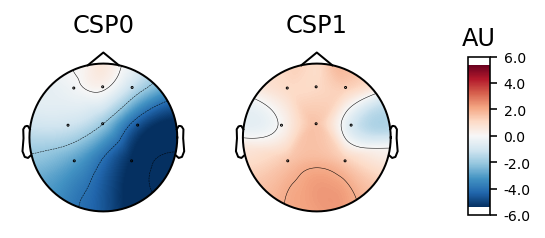

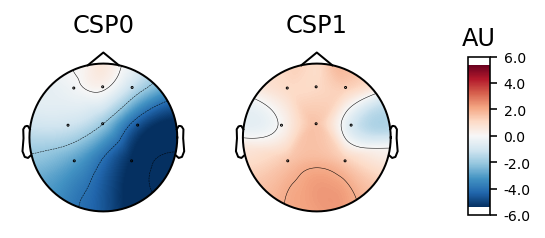

In [ ]:
CSPs[2].plot_patterns(epochs[2].info)

In [ ]:
print(trainX[0])

[[-2.42490904 -2.43113271 -2.1253584  ...  1.17753856  1.13645835
   0.87854973]
 [-0.90877261 -1.0970169  -1.23702023 ...  1.15769769  0.84982369
   0.36076085]
 [-0.52379403 -0.03318234  0.12757676 ... -0.10830444 -0.19572934
  -0.21432642]
 [-0.53929813 -0.7704938  -0.85610362 ...  0.19278396  0.06485035
  -0.00377215]]


In [ ]:
print(trainX[0])

[[ 0.38832197  0.00380459 -0.16667668 ...  0.78976817  0.50104511
   0.20344055]
 [-0.19382806 -0.39412341 -0.50224781 ... -0.38393215 -0.11542921
   0.20773724]
 [ 0.4278468  -0.00511209 -0.3254951  ... -0.90910916 -0.11604599
   0.57499638]
 [ 0.49271581  0.14663276 -0.43038958 ... -1.26236129 -1.47601646
  -1.28827835]]


In [ ]:
print(trainX[0])

[[-0.57232685 -0.52301875 -0.41746772 ... -0.60776144 -0.62458051
  -0.57838203]
 [ 0.6735048   0.99372167  1.05960432 ...  0.43944234  0.97487148
   1.2775786 ]
 [-0.36746613 -0.55018824 -0.55529437 ... -0.31080037  0.28618536
   0.76902876]
 [ 0.64834247  0.84382058  0.74135414 ...  0.2667926   0.01489482
  -0.1625604 ]]


In [ ]:
print(len(trainX))
print(len(trainYLabels[0]))

972
108


In [ ]:
#print(len(trainX))
for i in trainX:
  print(i.shape)

In [ ]:
print(len(trainXS))

27


In [ ]:
print(trainXS[0].shape)

(8, 41, 501)


In [ ]:
print(trainXS)

##reshape the stockwell tranform

In [ ]:
print(trainXS[0].shape)

(2, 41, 501)


In [ ]:
trainX, testX = [], []
for i in trainXS:
  trainX.append(np.reshape(i, (i.shape[0]*i.shape[1], i.shape[2])))
for i in testXS:
  testX.append(np.reshape(i, (i.shape[0]*i.shape[1], i.shape[2])))

In [ ]:
print(len(trainX))

972


In [ ]:
print(testX[0].shape)

(164, 501)


##encode and flatten labels

In [ ]:
def label_map(label):
  left = np.array([1,0])
  right = np.array([0,1])
  zero = np.array([0,0])
  #print(label, [1,0] if label==769 else None, [0,1] if label==770 else None)
  if label == 769:
    return left
  elif label == 770:
    return right
  else:
    return zero

In [ ]:
trainY = []
testY = []
for labels in trainYLabels:
  for label in labels:
    trainY.append(label_map(label))
    #trainY.append(left.copy() if label == 769 else right.copy())

for labels in testYLabels:
  for label in labels:
    testY.append(label_map(label))


##bicubic interpolation

In [ ]:
trainXResized = []
for i in trainX:
  width = i.shape[0]*2
  height = i.shape[1]*2
  trainXResized.append(np.array(Image.fromarray(i).resize((100, 22))))

testXResized = []
for i in testX:
  width = i.shape[0]*2
  height = i.shape[1]*2
  testXResized.append(np.array(Image.fromarray(i).resize((100, 22))))

###demo

In [ ]:
#img = Image.fromarray(np.swapaxes(trainX[0], 0, 1))
print(trainX[0].shape)
img = Image.fromarray(trainX[0])

(164, 501)


In [ ]:
img = img.resize((100, 22))

In [ ]:
img.save('test.tiff')

In [ ]:
temp = np.swapaxes(np.array(img), 0, 1)

In [ ]:
print(temp)

In [ ]:
Image.fromarray(testXResized[3]).save('test.tiff')

In [ ]:
print(np.swapaxes(np.array(img), 0, 1).shape)

(100, 22)


##convert to arrays

In [ ]:
trainX = np.array(trainXResized)
trainY = np.array(trainY)
testX = np.array(testXResized)
testY = np.array(testY)

#NN

In [ ]:
trainX = np.array(trainX)
trainY = np.array(trainY)
testX = np.array(testX)
testY = np.array(testY)

In [ ]:
print(testX.shape)

(1314, 4)


In [ ]:
#create model
model = Sequential()

model.add(Dense(512,input_shape=(trainX[0].shape),activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2,activation='softmax'))


model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               2560      
                                                                 
 dropout_16 (Dropout)        (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 dropout_17 (Dropout)        (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 64)               

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

earlystop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=100,min_delta=0.0001)
modelcheck = ModelCheckpoint('best_model.hdf5',monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')

In [ ]:
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=600, callbacks=[earlystop, modelcheck], batch_size=128)

Epoch 1/600
31/31 [==============================] - ETA: 0s - loss: 0.6551 - accuracy: 0.5789
Epoch 1: val_accuracy improved from -inf to 0.87443, saving model to best_model.hdf5
31/31 [==============================] - 2s 21ms/step - loss: 0.6551 - accuracy: 0.5789 - val_loss: 0.9276 - val_accuracy: 0.8744
Epoch 2/600
27/31 [=========================>....] - ETA: 0s - loss: 17.0004 - accuracy: 0.5576
Epoch 2: val_accuracy did not improve from 0.87443
31/31 [==============================] - 0s 12ms/step - loss: 20.0565 - accuracy: 0.5622 - val_loss: 19.8870 - val_accuracy: 0.8744
Epoch 3/600
27/31 [=========================>....] - ETA: 0s - loss: 229.2468 - accuracy: 0.5862
Epoch 3: val_accuracy did not improve from 0.87443
31/31 [==============================] - 0s 12ms/step - loss: 292.8514 - accuracy: 0.5901 - val_loss: 393.0043 - val_accuracy: 0.8744
Epoch 4/600
31/31 [==============================] - ETA: 0s - loss: 1709.9493 - accuracy: 0.6180
Epoch 4: val_accuracy did not i

#CNN

In [ ]:
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(972, 22, 100) (972, 2) (324, 22, 100) (324, 2)


In [ ]:
#trainX = tf.expand_dims(trainX, axis=-1)

In [ ]:
#testX = tf.expand_dims(testX, axis=-1)

In [ ]:
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(972, 22, 100) (972, 2) (324, 22, 100) (324, 2)


In [ ]:
print(trainX[0].shape)

(22, 100)


In [ ]:
print(trainX[0])

[[-0.09281521  0.43720394  0.42394185 ...  0.81021655 -0.8414636
  -0.61414826]
 [-0.05051572  0.43643433  0.339075   ...  0.77852637 -0.7986323
  -0.59631276]
 [ 0.02625004  0.43503758  0.18505731 ...  0.72101444 -0.7209014
  -0.56394464]
 ...
 [-0.14819859  0.6918021   0.84561455 ... -1.0723339  -0.8892728
   1.0728648 ]
 [-0.1756429   0.7708255   0.90630186 ... -1.1453106  -0.9639893
   1.1453614 ]
 [-0.19076526  0.8143691   0.9397418  ... -1.1855223  -1.0051596
   1.1853085 ]]


In [ ]:
print(trainX[0])

[[ 0.02782742  1.0850626   0.5625219  ...  0.1075898  -0.29624972
   0.10296883]
 [ 0.00899155  1.0277562   0.57156557 ...  0.12313601 -0.29578567
   0.1056447 ]
 [-0.02519209  0.92375565  0.5879781  ...  0.15134953 -0.2949435
   0.11050093]
 ...
 [ 0.8924047  -0.04532443 -0.23701845 ...  0.03165812 -0.5747647
  -0.06541935]
 [ 0.87080777 -0.02804022 -0.19866502 ...  0.10709414 -0.5948514
  -0.09568552]
 [ 0.85890746 -0.01851626 -0.1775315  ...  0.14866091 -0.60591954
  -0.11236279]]


In [ ]:
model = Sequential()#add model layers
model.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(22,100,1)))
model.add(MaxPool2D(pool_size=(2,2), strides=1))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=1))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=1))

model.add(Flatten())
model.add(Dense(output_num, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

earlystop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10,min_delta=0.0001)
modelcheck = ModelCheckpoint('best_model.hdf5',monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')

In [ ]:
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=600, batch_size=128, callbacks=[modelcheck, earlystop])

Epoch 1/600
8/8 [==============================] - ETA: 0s - loss: 0.6968 - accuracy: 0.4815
Epoch 1: val_accuracy improved from -inf to 0.52778, saving model to best_model.hdf5
8/8 [==============================] - 16s 541ms/step - loss: 0.6968 - accuracy: 0.4815 - val_loss: 0.6909 - val_accuracy: 0.5278
Epoch 2/600
7/8 [=========================>....] - ETA: 0s - loss: 0.6934 - accuracy: 0.5000
Epoch 2: val_accuracy improved from 0.52778 to 0.56790, saving model to best_model.hdf5
8/8 [==============================] - 1s 80ms/step - loss: 0.6935 - accuracy: 0.4949 - val_loss: 0.6925 - val_accuracy: 0.5679
Epoch 3/600
7/8 [=========================>....] - ETA: 0s - loss: 0.6900 - accuracy: 0.5569
Epoch 3: val_accuracy improved from 0.56790 to 0.58025, saving model to best_model.hdf5
8/8 [==============================] - 1s 79ms/step - loss: 0.6901 - accuracy: 0.5556 - val_loss: 0.6893 - val_accuracy: 0.5802
Epoch 4/600
7/8 [=========================>....] - ETA: 0s - loss: 0.6823 

In [ ]:
 model.predict(testX[10:20])

1/1 [==============================] - 0s 441ms/step


array([[1.43563345e-01, 8.56436670e-01],
       [2.80103117e-01, 7.19896853e-01],
       [6.53758287e-01, 3.46241713e-01],
       [5.71998537e-01, 4.28001434e-01],
       [1.40320987e-01, 8.59679043e-01],
       [5.68864048e-01, 4.31135923e-01],
       [5.97119443e-02, 9.40288067e-01],
       [1.78074315e-05, 9.99982238e-01],
       [9.18524444e-01, 8.14756230e-02],
       [8.75816584e-01, 1.24183394e-01]], dtype=float32)

In [ ]:
print(testY[10:20])

[[0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]]


# Feature Extraction


the following (as well as the idea of applying a filter) came from these papers https://link.springer.com/article/10.1007/s00521-021-06716-x#Equ3 and https://ieeexplore.ieee.org/document/9206638